# Support Set of Matrix Game
This tutorial investigate the support set size of matrix games.

In [35]:
import sys
sys.path.append("../..")

import numpy as np
import time
from mars.equilibrium_solver import *
import matplotlib.pyplot as plt              

Solvers = ['NashEquilibriaSolver', 'NashEquilibriumSolver', 
        'NashEquilibriumLPSolver', 'NashEquilibriumCVXPYSolver', 
        'NashEquilibriumGUROBISolver', 'NashEquilibriumECOSSolver', 
        'NashEquilibriumMWUSolver'][-2:-1]

Matrix_size = 20
Test_times = 10000


def get_NE_stats(Matrix_size, Test_times, threshold=0.1):
    random_matrices = [np.random.uniform(-1,1,Matrix_size**2).reshape(Matrix_size, Matrix_size) for _ in range(Test_times)]
    first_cnts, second_cnts = [], []
    for solver in Solvers:
        t0=time.time()
        for i in range(Test_times):
            ne, nev = eval(solver)(random_matrices[i])
            # print(ne[0])
            # print(np.where(ne[0]>0.1)[0].shape[0])
            first_num_entries = np.where(ne[0]>threshold)[0].shape[0] # number of entries with probability > threshold in NE policy
            second_num_entries = np.where(ne[1]>threshold)[0].shape[0]
            first_cnts.append(first_num_entries)
            second_cnts.append(second_num_entries)

        t1=time.time()
        print(solver, ',time taken per matrix: ', (t1-t0)/Test_times)
    print(np.bincount(first_cnts))
    print(np.bincount(second_cnts))
    counts, edges, bars = plt.hist(first_cnts)
    plt.bar_label(bars)
    plt.show()
    return first_cnts, second_cnts

NashEquilibriumECOSSolver ,time taken per matrix:  0.0007347253561019898
[   0    1  168 1584 3937 3303  934   73]
[   0    7  211 1522 4030 3231  926   73]


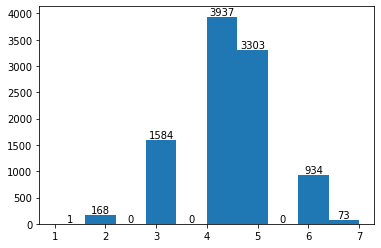

In [37]:
_, _ = get_NE_stats(20, 10000, 0.1)

NashEquilibriumECOSSolver ,time taken per matrix:  0.00047951247692108154
[   0   27  694 3189 4164 1725  198    3]
[   0   24  645 3193 4197 1734  203    4]


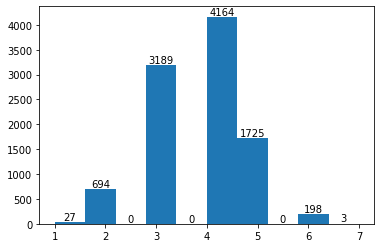

In [38]:
_, _ = get_NE_stats(10, 10000, 0.1)

NashEquilibriumECOSSolver ,time taken per matrix:  0.0004844419240951538
[2328 5288 2364   20]
[2353 5190 2429   28]


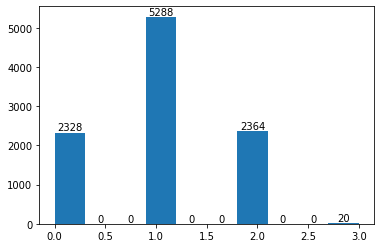

In [39]:
_, _ = get_NE_stats(10, 10000, 0.3)

NashEquilibriumECOSSolver ,time taken per matrix:  0.0004949474811553955
[   0    4   63  605 2180 3510 2648  861  126    3]
[   0    5   65  588 2204 3468 2653  887  125    5]


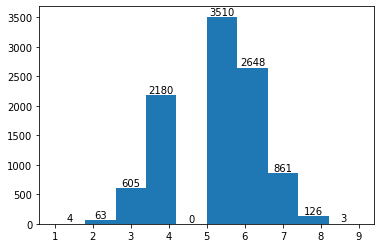

In [40]:
_, _ = get_NE_stats(10, 10000, 0.01)